In [1]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())

3.6.9


In [2]:
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 2.3.0
keras: 2.4.3


In [3]:
# import libaries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline

In [5]:
# Import data
os.getcwd()
df = pd.read_csv('mnist_test.csv')

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Investigate Data
type(df)

pandas.core.frame.DataFrame

In [7]:
df.size
df.shape

7850000

(10000, 785)

In [8]:
df.head(5)
df.tail(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9999,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
print ('Overall data summary')
df.describe()
print('Counts of Labels')
df.groupby("label").size()

Overall data summary


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0038,0.0236,0.0158,0.040300,0.051100,0.104700,...,3.798100,2.634600,1.410300,0.895600,0.551000,0.289100,0.115100,0.05000,0.002700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002200,0.043500,0.088800,0.133200,0.160000,0.184300,0.3123,0.453400,0.558300,0.574600,0.458200,0.274100,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3800,2.3600,1.5800,2.884113,2.699336,4.516213,...,27.290079,22.163799,16.149589,12.790765,10.191182,7.523203,4.333536,3.08954,0.225605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165523,2.719218,4.285178,4.989063,5.620156,5.372897,7.6112,9.274601,10.181816,10.410152,9.750024,7.050811,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000

Counts of Labels


label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64

In [10]:
Y = df.iloc[:,0:1]
X= df.iloc[:,1:785]
Y
X

,label
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Create Features and Labels and Standardize data
Y = df.iloc[:,0:1]
X= df.iloc[:,1:785]
std = StandardScaler()
X_Features= std.fit_transform(X)
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(7500, 784)

(2500, 784)

(7500, 1)

(2500, 1)

numpy.ndarray

Here we have created test and train split of our dataset in 25:75 ratio .so training dataset has 7500 rows of input data and 784 input columns.test dataset  has 2500 rows and 784 input columns.target variable for train and test has 1 columns and 7500 and 2500 rows respectively.


In [12]:
# Build Deep Learning Model
model = Sequential()
model.add(Dense(1024, input_dim =784))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adagrad',metrics=['accuracy'])
 
train_x = np.array(train_x)
train_y = np.array(train_y)
# Fit the model
model.fit(train_x,train_y, epochs=10, batch_size=64)

Epoch 1/10
118/118 [==============================] - 0s 3ms/step - loss: 2.3369 - accuracy: 0.1420
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 2.1605 - accuracy: 0.2604
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 1.9652 - accuracy: 0.3643
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 1.7311 - accuracy: 0.4521
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 1.5253 - accuracy: 0.5044
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 1.3568 - accuracy: 0.5551
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 1.2326 - accuracy: 0.5963
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 1.1032 - accuracy: 0.6381
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 1.0156 - accuracy: 0.6741
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.9311 - accuracy: 0.7000

In [13]:
# evaluate the model 
scores = model.evaluate(test_x, test_y) 
print("test model accuracy is\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

79/79 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.8508
test model accuracy is
accuracy: 85.08%


here we are creating Keras Sequential model by passing a list of layer instances to the constructor.here we are using relu as Non-linear activation function which allows neural networks to learn complex,non-linear transformation of the inputs.

Basically neural networks have layers of neurons.There is input layer where features are fed in.There is output layer where output variable is fed.
In between input and output there are many layers and these are called hidden layers.
A layer is nothing but set of neurons.Every layer has few numbers of neurons.
These layers are interconnected and they are dense layers and layers talk to each other through neurons. And not all neurons are activated through the activation functions so that they be able to talk to each other.

Based on activation functions, neurons are talking or not talking to each other. Based on weights of neurons these neurons send weaker or stronger signals to one-another.
Loss is difference between actual loss and estimated loss and losses are backward propagated.

One set of forward propagation and one backward propagation is called Epoch.here we have used 10 Epoch for building the deep learning MAodel.
When you have one input layer, one output layer and many hidden layers these are called deep neural network.

In the above example we have one input layer where 784  features are fed. input layer expect a one-dimensional array of 784 elements as each individual sample. It would produce 1024 outputs.

we have used four hidden layers with 512,256,128,64 neurons respectively with each of them using relu as activation function.

we have used one output layer where 10 output variables were fed and softmax is the activation function used for the output layer.

The choice of loss simply resides in understanding what types of errors are acceptable or not acceptable in the specific problem under consideration.The loss function is one of the two parameters required to compile a model.

optimizers are methods to quickly take steps in parameter space that are going to be good for minimizing the global loss function.optimizer is the second argument required for compiling a keras model.loss='sparse_categorical_crossentropy',optimizer='Adagrad' is what we have used for compiling our keras model.

dropouts is added in as a layer.it masks the outputs of the previous layer such that some of them will randomly become inactive and will not contribute to information propagation.we have used 0.2 as dropouts.

test model accuracy: 85.08%.






In [14]:
# Build Deep Learning Model
model = Sequential()
model.add(Dense(512, input_dim =784))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_x,train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 1.7076 - accuracy: 0.5005 - val_loss: 1.1550 - val_accuracy: 0.7740
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.9765 - accuracy: 0.7811 - val_loss: 0.7551 - val_accuracy: 0.8344
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6963 - accuracy: 0.8417 - val_loss: 0.5875 - val_accuracy: 0.8640
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.5538 - accuracy: 0.8715 - val_loss: 0.4947 - val_accuracy: 0.8768
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4699 - accuracy: 0.8861 - val_loss: 0.4367 - val_accuracy: 0.8872
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8984 - val_loss: 0.3974 - val_accuracy: 0.8964
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3680 - accuracy: 0.9088 - val_loss: 0.3695 - val_accuracy: 0.9044
Epoch 

Here we have used 10 Epoch for building the deep learning Model.

In the above example we have one input layer where 784  features are fed. input layer expect a one-dimensional array of 784 elements as each individual sample. It would produce 512 outputs.

we have used four hidden layers with 256,128,100,10 neurons respectively with two of them using relu as activation function and other two using tanh as activatiom function.

we have used one output layer where 10 output variables were fed and softmax is the activation function used for the output layer.

loss='sparse_categorical_crossentropy',optimizer='Adagrad' is what we have used for compiling our keras model.

we have used 0.2 as dropouts.test model accuracy is 91.48%.


In [16]:
# evaluate the model 
scores = model.evaluate(test_x, test_y) 
print("test model accuracy is\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

79/79 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.9148
test model accuracy is
accuracy: 91.48%


In [17]:
from sklearn import metrics 
classes = model.predict_classes(test_x, batch_size=32, verbose=0) 
print (classes.size) 
print (metrics.accuracy_score(test_y, classes)) 
print ('Precision/Recall Metrics') 
print (metrics.classification_report(test_y,classes))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
2500
0.9148
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       254
           1       0.96      0.98      0.97       292
           2       0.94      0.87      0.90       277
           3       0.89      0.92      0.90       253
           4       0.87      0.95      0.91       235
           5       0.89      0.83      0.86       201
           6       0.91      0.96      0.93       232
           7       0.93      0.91      0.92       262
           8       0.90      0.87      0.88       245
           9       0.89      0.88      0.88       249

    accuracy                     

Confusion Matrix


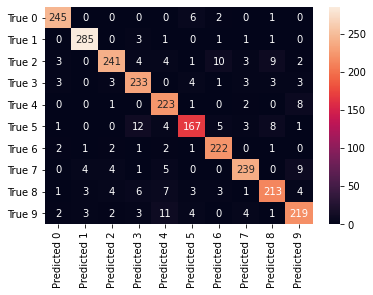

In [18]:
print ('Confusion Matrix')
cf=  metrics.confusion_matrix(test_y,classes)
lbl1 = ["Predicted 0","Predicted 1","Predicted 2","Predicted 3","Predicted 4","Predicted 5","Predicted 6","Predicted 7","Predicted 8","Predicted 9"]
lbl2 = ["True 0","True 1","True 2","True 3","True 4","True 5","True 6","True 7","True 8","True 9"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();

In [19]:
!jupyter nbconvert MODULE5_DAY4_ASSIGNMENT_MNIST.ipynb

[NbConvertApp] Converting notebook MODULE5_DAY4_ASSIGNMENT_MNIST.ipynb to html
[NbConvertApp] Writing 395188 bytes to MODULE5_DAY4_ASSIGNMENT_MNIST.html
